In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from util.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ACN', 'ADBE', 'ADYEY', 'AMD', 'AMGN',
    'AMZN', 'ANET', 'ASML', 'AXON', 'BROS', 'BYND', 'CHWY', 'CRWD',
    'DDOG', 'DGX', 'DIS', 'DOCS', 'DOCU', 'DUOL', 'EDIT', 'ETSY',
    'FLGT', 'FTNT', 'GH', 'GMED', 'GOOG', 'IDXX', 'INTG', 'ISRG',
    'JD', 'LRCX', 'LSPD', 'LULU', 'MA', 'MASI', 'MDB', 'MELI', 'MNST',
    'MSFT', 'MTCH', 'NET', 'NOW', 'NVCR', 'NVDA', 'ODFL', 'OKTA',
    'OPEN', 'PAC', 'PANW', 'PAYC', 'PINS', 'PTON', 'PYPL', 'QDEL',
    'RBLX', 'RDFN', 'RGEN', 'RIVN', 'RMD', 'ROKU', 'RVLV', 'SAM',
    'SBUX', 'SE', 'SHOP', 'SNOW', 'TASK', 'TDOC', 'TEAM', 'TMUS', 
    'TREX', 'TSCO', 'TSLA', 'TTD', 'TTWO', 'TWLO', 'TWTR', 'TYL',
    'UPST', 'VEEV', 'VLD', 'VRTX', 'XPEV', 'ZEN', 'ZM']
LINGERERS = [
    'AGI', 'AMEH', 'AMRK', 'APT', 'BRTX', 'BTTR', 'BYRN',
    'CELH', 'CEF', 'CENN', 'CGAU', 'CHEF', 'CTGO', 'CVE', 'DQ', 'DTST',
    'DYAI', 'EA', 'EP', 'ERIE', 'ESOA', 'FCUV', 'FKWL', 'FNV',
    'GCBC', 'GGE', 'GME', 'HBM', 'HMY', 'HNRG', 'IDR', 'INTZ',
    'MCVT', 'MICS', 'MNMD', 'MOBQ', 'MTA',
    'OMQS', 'PACB', 'PETV', 'POWW', 'PRPH', 'RVP', 'RVYL', 'SAND',
    'SOBR', 'TRGP', 'VIRT', 'WAVD', 'WKHS', 'WRN', 'YORW', 'ZEST']
BEST_WEIGHTED = [
    'AMRC', 'CLW', 'COOP', 'CSIQ', 'ESTE', 'FSI', 'GGB', 'LFMD', 
    'LPLA', 'MTDR', 'PARR', 'PRIM', 'SIX', 'TGLS', 'TITN', 'TRGP',
    'UTHR', 'VIVO', 'VOC', 'ZYXI']

INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)

In [3]:
N_YEARS = 10 # 5
N_DAYS = int(round(365.25 * N_YEARS))
END = (datetime.now() + timedelta(1)).date()
START = str(END - timedelta(N_DAYS))
START, END

('2013-01-14', datetime.date(2023, 1, 14))

In [4]:
batch = (
    sorted(list(set(SYMBOLS + LINGERERS + BEST_WEIGHTED))) + INDICES) # run all
stock_loader = Loader(batch, START, str(END), verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  164 of 164 completed
Generating derived columns...
AAPL... ABMD... ABNB... ACN... ADBE... ADYEY... AGI... AMD... AMEH... AMGN... AMRC... AMRK... AMZN... ANET... APT... ASML... AXON... BROS... BRTX... BTTR... BYND... BYRN... CAR... CEF... CELH... CENN... CGAU... CHEF... CHWY... CLW... COOP... CRWD... CSIQ... CTGO... CVE... DDOG... DGX... DIS... DOCS... DOCU... DQ... DTST... DUOL... DYAI... EA... EDIT... EP... ERIE... ESOA... ESTE... ETSY... FCUV... FKWL... FLGT... FNV... FSI... FTNT... GCBC... GGB... GGE... GH... GME... GMED... GOOG... HBM... HMY... HNRG... IDR... IDXX... INTG... INTZ... ISRG... JD... LFMD... LPLA... LRCX... LSPD... LULU... MA... MASI... MCVT... MDB... MELI... MICS... MNMD... MNST... MOBQ... MSFT... MTA... MTCH... MTDR... NET... NOW... NVCR... NVDA... ODFL... OKTA... OMQS... OPEN... PAC... PACB... PANW... PARR... PAYC... PETV... PINS... POWW... PRIM... PRPH... PTON... PYPL... QDEL... RBLX... RDFN... RGEN... RIVN... RMD

In [5]:
data['Date'].tail()

2514   2023-01-09
2515   2023-01-10
2516   2023-01-11
2517   2023-01-12
2518   2023-01-13
Name: Date, dtype: datetime64[ns]

In [6]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       1.001129
2       1.000197
3       1.005643
4       1.003403
5       1.004428
          ...   
2514    0.999232
2515    1.006978
2516    1.012849
2517    1.003416
2518    1.003997
Name: ^GSPC, Length: 2518, dtype: float64

In [7]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,1.014881
2,1.001468
3,1.016091
4,1.004118
5,1.015320
...,...
2514,1.030274
2515,1.030343
2516,1.033848
2517,1.021629


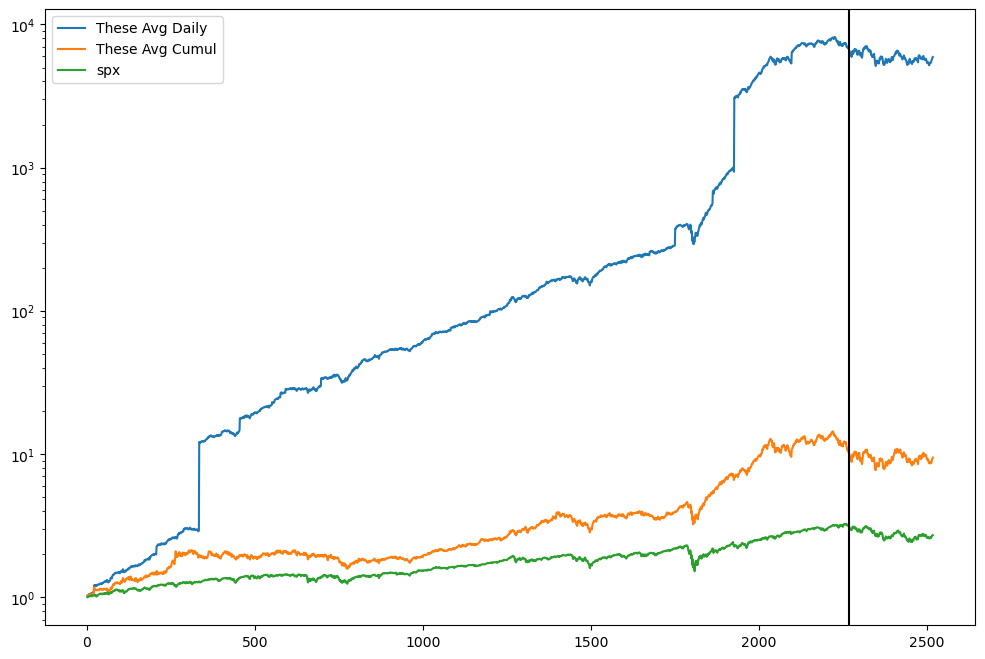

In [8]:
plt.figure(figsize=[12, 8])
plt.plot(
    data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
    label='These Avg Daily')
plt.plot(
    data['DayToDayChange'].cumprod().mean(axis=1),
    label='These Avg Cumul')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [9]:
out = pd.DataFrame(data.Date)
out['mine1'] = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
out['mine2'] = data['DayToDayChange'].cumprod().mean(axis=1)
out.head()

,Date,mine1,mine2
0,2013-01-14,NaN,NaN
1,2013-01-15,1.026149,1.026149
2,2013-01-16,1.022442,1.016641
3,2013-01-17,1.029219,1.021843
4,2013-01-18,1.036994,1.031224


In [10]:
out.tail()

,Date,mine1,mine2
2514,2023-01-09,5584.630930,8.767331
2515,2023-01-10,5683.391023,8.976600
2516,2023-01-11,5788.535065,9.221117
2517,2023-01-12,5873.542321,9.281934
2518,2023-01-13,5927.635498,9.454131


In [11]:
!ls ../data

all_symbols.pkl             nasdaq_sharpes_by_state.csv
dev_quantiles.csv           nya1965.csv
historic.csv                pct_params
hmm_exp_returns.csv         scoring.csv
mine.csv                    sharpes_by_state.csv
myHistoric.RData            sp1950.csv
myHistoricTest.RData        wilshire1990.csv
nasdaq1965.csv


In [12]:
out.iloc[1:, :].to_csv('../data/mine.csv', index=False)

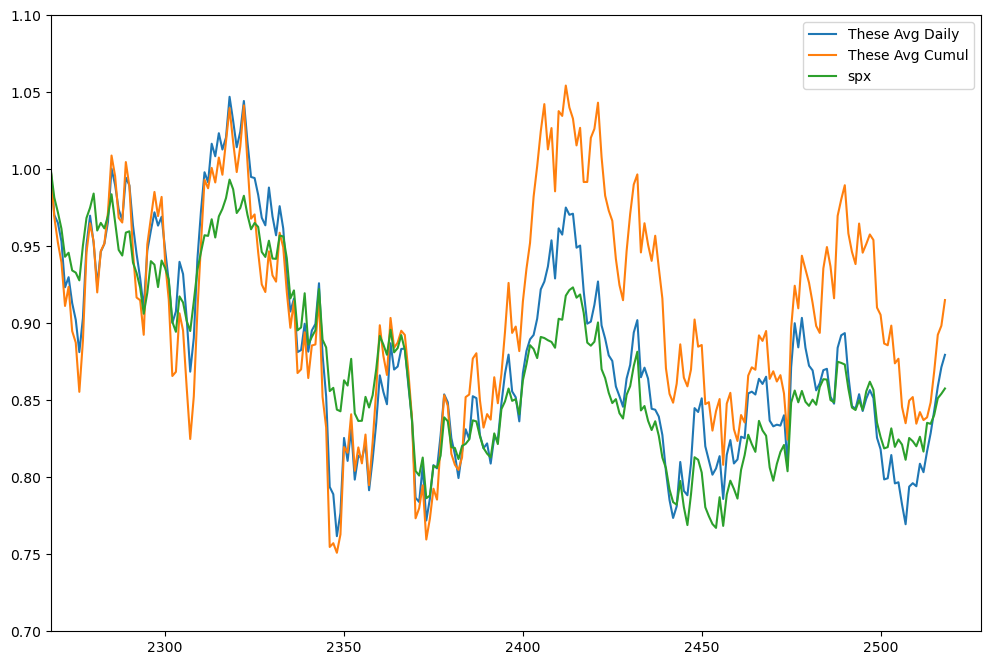

In [13]:
plt.figure(figsize=[12, 8])
a = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
n = len(a)
start = n - 250
a = a / a[start]
b = data['DayToDayChange'].cumprod().mean(axis=1)
b = b / b[start]
s = spx.cumprod()
s = s / s[start]
plt.plot(a, label='These Avg Daily')
plt.plot(b, label='These Avg Cumul')
plt.plot(s, label='spx')
#plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim(0.7, 1.1)
plt.legend();

In [14]:
def get_stock_data(stock, data, n_days=60):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()]
                   .index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    if len(sub) > n_days:
        sub = sub.iloc[-n_days:, :]
    return sub

In [15]:
rblx = get_stock_data('SE', data)
rblx.head()

,Value,Close,High,Low,Open,LogValue,IntradayChange,DayToDayChange,OvernightChange
2459,47.919998,47.919998,52.430000,45.830002,52.430000,3.869533,0.913981,0.892531,0.976532
2460,47.389999,47.389999,50.299999,47.115002,48.310001,3.858411,0.980956,0.988940,1.008139
2461,46.180000,46.180000,46.340000,44.250000,45.799999,3.832547,1.008297,0.974467,0.966449
2462,47.009998,47.009998,47.020000,42.709999,44.360001,3.850360,1.059738,1.017973,0.960589
2463,50.009998,50.009998,50.494999,47.700001,47.889999,3.912223,1.044268,1.063816,1.018719


In [16]:
rblx = rblx[['Value', 'Close', 'High', 'Low']]
rblx.head()

,Value,Close,High,Low
2459,47.919998,47.919998,52.430000,45.830002
2460,47.389999,47.389999,50.299999,47.115002
2461,46.180000,46.180000,46.340000,44.250000
2462,47.009998,47.009998,47.020000,42.709999
2463,50.009998,50.009998,50.494999,47.700001


In [17]:
rblx['NextHigh'] = rblx.High.shift(-1)
rblx['NextLow'] = rblx.Low.shift(-1)
rblx['HighMult'] = rblx.NextHigh / rblx.Close
rblx['LowMult'] = rblx.NextLow / rblx.Close
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult
2459,47.919998,47.919998,52.430000,45.830002,50.299999,47.115002,1.049666,0.983201
2460,47.389999,47.389999,50.299999,47.115002,46.340000,44.250000,0.977843,0.933741
2461,46.180000,46.180000,46.340000,44.250000,47.020000,42.709999,1.018190,0.924859
2462,47.009998,47.009998,47.020000,42.709999,50.494999,47.700001,1.074133,1.014678
2463,50.009998,50.009998,50.494999,47.700001,53.009998,50.020000,1.059988,1.000200


0.05    0.984297
Name: HighMult, dtype: float64


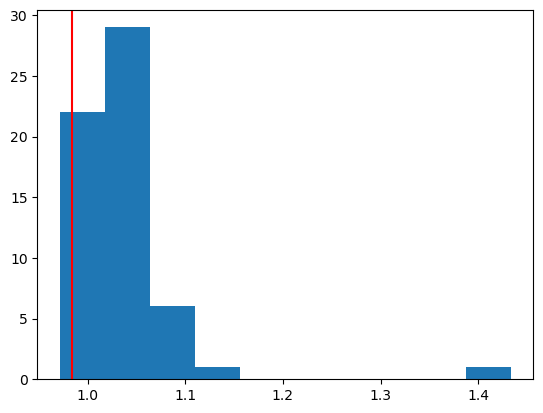

In [18]:
# For selling:
high_05 = rblx.HighMult.quantile(q=[0.05])
print(high_05)
plt.hist(rblx.HighMult)
plt.axvline(x=high_05[0.05], color='red');

1.0177317061407019


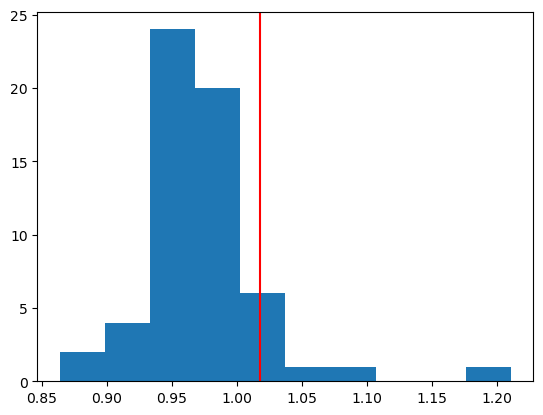

In [19]:
# For buying:
low_95 = rblx.LowMult.quantile(q=[0.95])
print(low_95.tolist()[0])
plt.hist(rblx.LowMult)
plt.axvline(x=low_95[0.95], color='red');

In [20]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [21]:
get_hilo_mult(rblx)

(1.0177317061407019, 0.9842969131498367)

In [22]:
aapl = get_stock_data('AAPL', data)
get_hilo_mult(aapl)

(1.0044020497626474, 0.9901463579599322)

In [23]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [24]:
rblx['Trend'] = get_macd(rblx)
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult,Trend
2459,47.919998,47.919998,52.430000,45.830002,50.299999,47.115002,1.049666,0.983201,0
2460,47.389999,47.389999,50.299999,47.115002,46.340000,44.250000,0.977843,0.933741,0
2461,46.180000,46.180000,46.340000,44.250000,47.020000,42.709999,1.018190,0.924859,0
2462,47.009998,47.009998,47.020000,42.709999,50.494999,47.700001,1.074133,1.014678,0
2463,50.009998,50.009998,50.494999,47.700001,53.009998,50.020000,1.059988,1.000200,1


In [25]:
def get_hilo_mults(stock, ci=0.95):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    sell_pt_up = upward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_up = upward.LowMult.quantile(q=[ci]).tolist()[0]
    sell_pt_down = downward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_down = downward.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt_up, sell_pt_up, buy_pt_down, sell_pt_down

In [26]:
get_hilo_mults(rblx)

(1.0057796815543059, 0.9879927260206336, 1.0698456763895043, 0.984433590331245)

In [27]:
get_hilo_mults(aapl)

(0.9989604232947964,
 0.9901042988204012,
 1.0152704414422962,
 0.9924310629561944)

In [28]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=[
        'stock', 'buy_pt_up', 'sell_pt_up', 'buy_pt_down', 
        'sell_pt_down'])
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down
0,AAPL,0.998960,0.990104,1.015270,0.992431
1,ABMD,1.001521,0.999412,1.004032,1.000000
2,ABNB,1.003761,0.992490,1.009863,0.984687
3,ACN,1.003142,0.991645,1.009495,0.989160
4,ADBE,1.001729,0.996380,1.023277,0.995423


In [29]:
last = data.index.max()
price = pd.DataFrame(data.loc[last, 'Value'])
price.columns = ['price']
price['stock'] = price.index
price

,price,stock
AAPL,134.759995,AAPL
ABMD,NaN,ABMD
ABNB,100.370003,ABNB
ACN,282.140015,ACN
ADBE,344.380005,ADBE
...,...,...
ZM,69.489998,ZM
ZYXI,16.799999,ZYXI
^GSPC,3999.090088,^GSPC
^IXIC,11079.160156,^IXIC


In [30]:
df = df.merge(price, how='left', on='stock')
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down,price
0,AAPL,0.998960,0.990104,1.015270,0.992431,134.759995
1,ABMD,1.001521,0.999412,1.004032,1.000000,NaN
2,ABNB,1.003761,0.992490,1.009863,0.984687,100.370003
3,ACN,1.003142,0.991645,1.009495,0.989160,282.140015
4,ADBE,1.001729,0.996380,1.023277,0.995423,344.380005


In [31]:
df.to_csv('mults.csv', index=False)
!open ./mults.csv